> I've been busy recently working on my thesis, Maybe i should share my thesis model when it finished as well.

So today I'm trying another housing dataset (because there was a lot of string features before), today I'm focusing on observing the impact of string feature if it changed to integer compared to when it dropped.

In [142]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hands-on-machine-learning-housing-dataset/housing.csv


In [143]:
df = pd.read_csv("/kaggle/input/hands-on-machine-learning-housing-dataset/housing.csv")

There's only ONE string feature

In [144]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [145]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [146]:
df["total_bedrooms"] = df["total_bedrooms"].fillna(0)

Let's change the string feature into integer (representing its class)

In [147]:
col = df["ocean_proximity"]
op = list(set(col))
col = [op.index(x) for x in col]
df["ocean_proximity"] = col

In [148]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,4
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2


Let's see the correlation between features

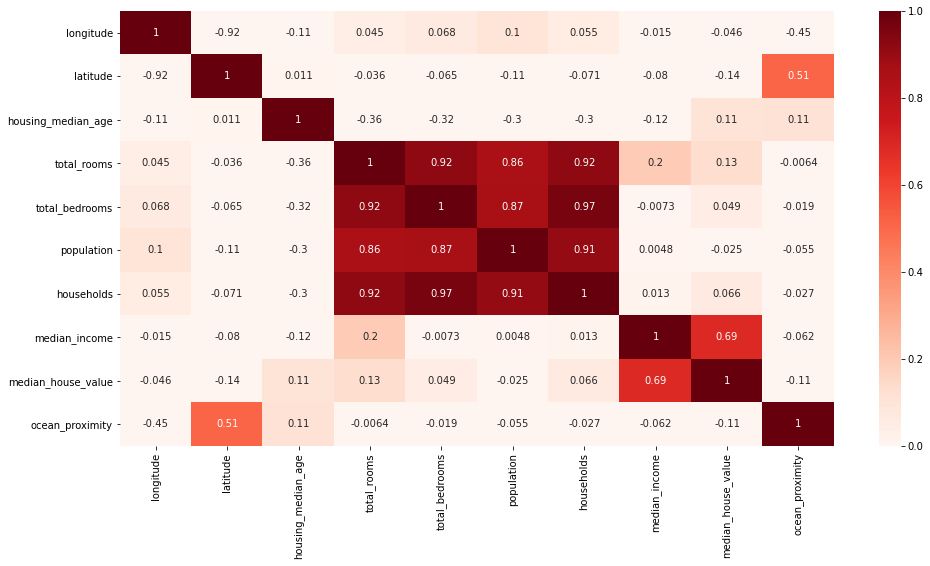

In [149]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True, linewidths=0, vmin=0, cmap="Reds")


Let's try throw this dataframe to LR first

In [150]:
X = df.drop(["median_house_value"], axis=1)
Y = df["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X,Y)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6414634045053081

Since I'm trying to predict median_house_value, I'm dropping features with no correlation with it

In [151]:
df.corr()["median_house_value"]

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049148
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
ocean_proximity      -0.112125
Name: median_house_value, dtype: float64

In [152]:
df = df.drop(["longitude", "latitude", "population"], axis=1)

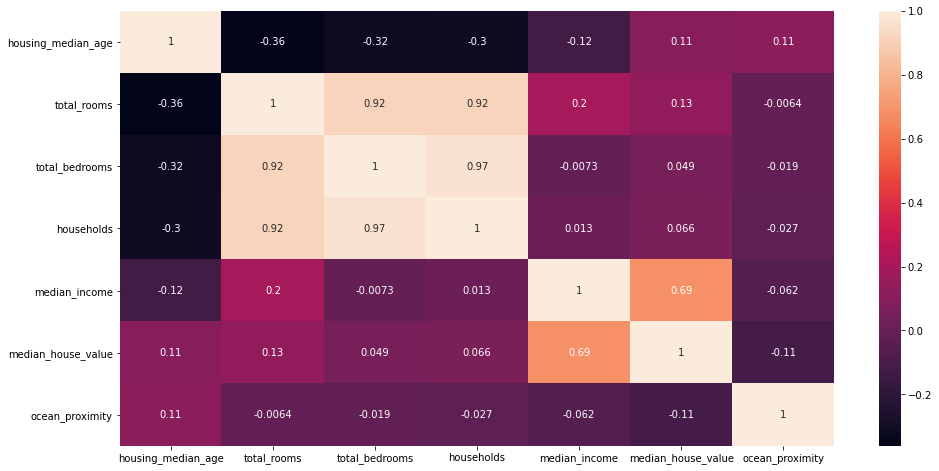

In [153]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True)

In [154]:

X = df.drop(["median_house_value"], axis=1)
Y = df["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X,Y)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.556230429660694

Now let's drop the string feature, and then run the LR again

In [155]:
X_train = X_train.drop(["ocean_proximity"], axis=True)
X_test = X_test.drop(["ocean_proximity"], axis=True)

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X,Y)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5449154077559708

**Conclusion:**
The performance interestingly decreased after I dropped the features with no correlation. I should search for the reason tomorrow.


The interesting part is because the string feature has high correlation with median_house_value, and the model works better when I used string feature that converted into integer rather than dropping it.